# Export as extrapolated .tsv from Track Attack with all columns

In [80]:
import pandas as pd
from pathlib import Path
from os.path import abspath, dirname, split, splitext
data_path = abspath("data")
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
column_names = ['start_date', 'start_time', 'lap_number', 'session_time', 'lap_time',
       'long_acceleration', 'lattitude', 'gps_lat_acceleration',
       'heading', 'rpm', 'gps_distance', 'gps_long_acceleration',
       'lat_cceleration', 'longitude', 'gps_speed',
       'num_satellites', 'throttle_position','file']

In [72]:
df_dict = {}
meta_dict = {}
p = Path(data_path)
for item in p.iterdir():
    if item.is_dir():
        dir_name = split(item)[1]
        first = True
        meta = {}
        for file in item.iterdir():
            file_name = split(file)[1]
            if splitext(file)[1] == '.tsv':
                if first:
                    df_final = pd.read_csv(file, delimiter = "\t")
                    df_final['file'] = file_name
                    first = False
                else:
                    df = pd.read_csv(file, delimiter = "\t")
                    df['file'] = file_name
                    df_final = df_final.append(df)
        df_final = df_final.reset_index(drop=True)
        df_final.columns = column_names
        df_dict[dir_name] = df_final
        meta['track'] = dir_name.split("_")[0]
        meta['track_config'] = dir_name.split("_")[1]
        meta['driver'] = dir_name.split("_")[2]
        meta['date'] = dir_name.split("_")[3]
        meta['track_and_config'] = dir_name.split("_")[0] + '-' + dir_name.split("_")[1]
        meta_dict[dir_name] = meta

In [73]:
df_dict.keys()

dict_keys(['umc_east_br_4_23_21'])

In [74]:
key = 'umc_east_br_4_23_21'

In [75]:
race_data = df_dict[key]
race_data

,start_date,start_time,lap_number,session_time,lap_time,long_acceleration,lattitude,gps_lat_acceleration,heading,rpm,gps_distance,gps_long_acceleration,lat_cceleration,longitude,gps_speed,num_satellites,throttle_position,file
0,2021-04-23,21:49:33,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,session_4.tsv
1,2021-04-23,21:49:33,0,100000000,100000000,0.11,40.583207,0.000000,269.9,0.0,3.850000,0.000000,0.00,-112.375962,138.6,15.0,0.0,session_4.tsv
2,2021-04-23,21:49:33,0,200000000,200000000,0.11,40.583207,0.000000,269.9,0.0,7.700000,0.000000,0.00,-112.376008,138.6,15.0,0.0,session_4.tsv
3,2021-04-23,21:49:33,0,300000000,300000000,0.11,40.583207,0.000000,269.9,0.0,11.550000,0.000000,0.00,-112.376053,138.6,15.0,0.0,session_4.tsv
4,2021-04-23,21:49:33,0,400000000,400000000,0.11,40.583207,0.000000,269.9,0.0,15.400000,0.000000,0.00,-112.376099,138.6,15.0,0.0,session_4.tsv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56032,2021-04-23,15:39:00,12,1513500000000,194154272812,0.14,40.583345,-0.088157,269.0,0.0,42785.713500,0.000000,0.11,-112.376363,39.7,18.0,0.0,session_1.tsv
56033,2021-04-23,15:39:00,12,1513600000000,194254272812,0.13,40.583345,0.019640,269.0,0.0,42786.816886,-0.014172,0.11,-112.376375,39.6,18.0,0.0,session_1.tsv
56034,2021-04-23,15:39:00,12,1513700000000,194354272812,0.12,40.583344,0.087934,268.1,0.0,42787.917729,-0.099206,0.11,-112.376389,39.7,18.0,0.0,session_1.tsv
56035,2021-04-23,15:39:00,12,1513800000000,194454272812,0.12,40.583344,-0.028940,269.2,0.0,42789.017347,-0.085034,0.11,-112.376402,39.5,18.0,0.0,session_1.tsv


In [127]:
std_devs= 2
y_mean = race_data['lattitude'].mean()
y_std = race_data['lattitude'].std()
y_bound_low = y_mean - y_std*std_devs
y_bound_high = y_mean + y_std*std_devs
x_mean = race_data['longitude'].mean()
x_std = race_data['longitude'].std()
x_bound_low = x_mean - x_std*std_devs
x_bound_high = x_mean + x_std*std_devs


In [137]:
rd_clean = race_data[(race_data.lattitude < y_bound_high) & (race_data.lattitude > y_bound_low) &
                    (race_data.longitude < x_bound_high) & (race_data.longitude > x_bound_low)]
rd_clean['lat_abs'] = rd_clean['lattitude'].abs()
rd_clean['long_abs'] = rd_clean['longitude'].abs()
rd_clean = rd_clean.copy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [130]:
meta_dict[key]

{'track': 'umc',
 'track_config': 'east',
 'driver': 'br',
 'date': '4',
 'track_and_config': 'umc-east'}

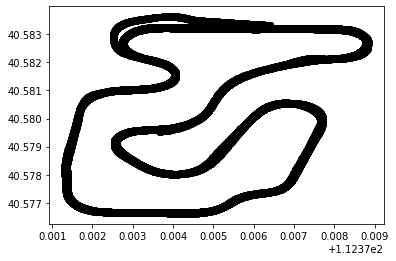

In [136]:
plt.plot(rd_clean['long_abs'],rd_clean['lat_abs'], 'o', color='black');
